In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [2]:
data = pd.read_csv('RELIANCE.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
data = data.sort_values('Date')

In [5]:
df = data[['Date', 'Close']]

In [6]:
df.set_index('Date', inplace=True)

In [7]:
df = df.dropna()

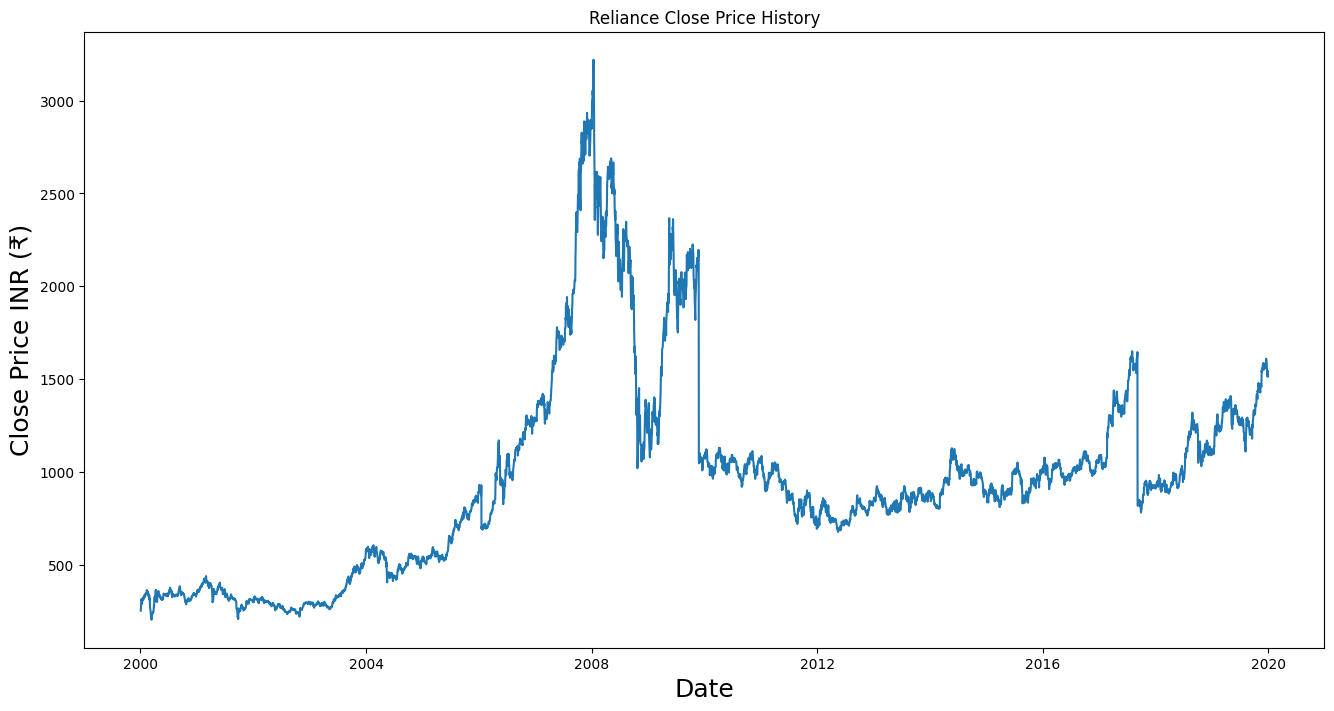

In [8]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Reliance Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.show()

In [10]:
# Prepare data for LSTM
# We need to scale the data between 0 and 1
dataset = df.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [11]:
# Create training and testing datasets
# Use 80% for training, 20% for testing
train_len = math.ceil(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_len, :]
test_data = scaled_data[train_len - 60: , :]  # 60 timesteps for lookback

In [12]:
# Function to create dataset with lookback
def create_dataset(data, look_back=60):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [13]:
# Create train and test sets
x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)  # Increase epochs for better accuracy

3921/3921 ━━━━━━━━━━━━━━━━━━━━ 118s 28ms/step - loss: 0.0019


In [20]:
# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [29]:
# Prepare valid data for comparison
train = df[:train_len]
valid = df[train_len:train_len + len(predictions)]
valid['Predictions'] = predictions




/tmp/ipython-input-4169493307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [30]:
# Step 7: Evaluate the model
rmse = np.sqrt(mean_squared_error(valid['Close'], valid['Predictions']))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 47.51648333122643


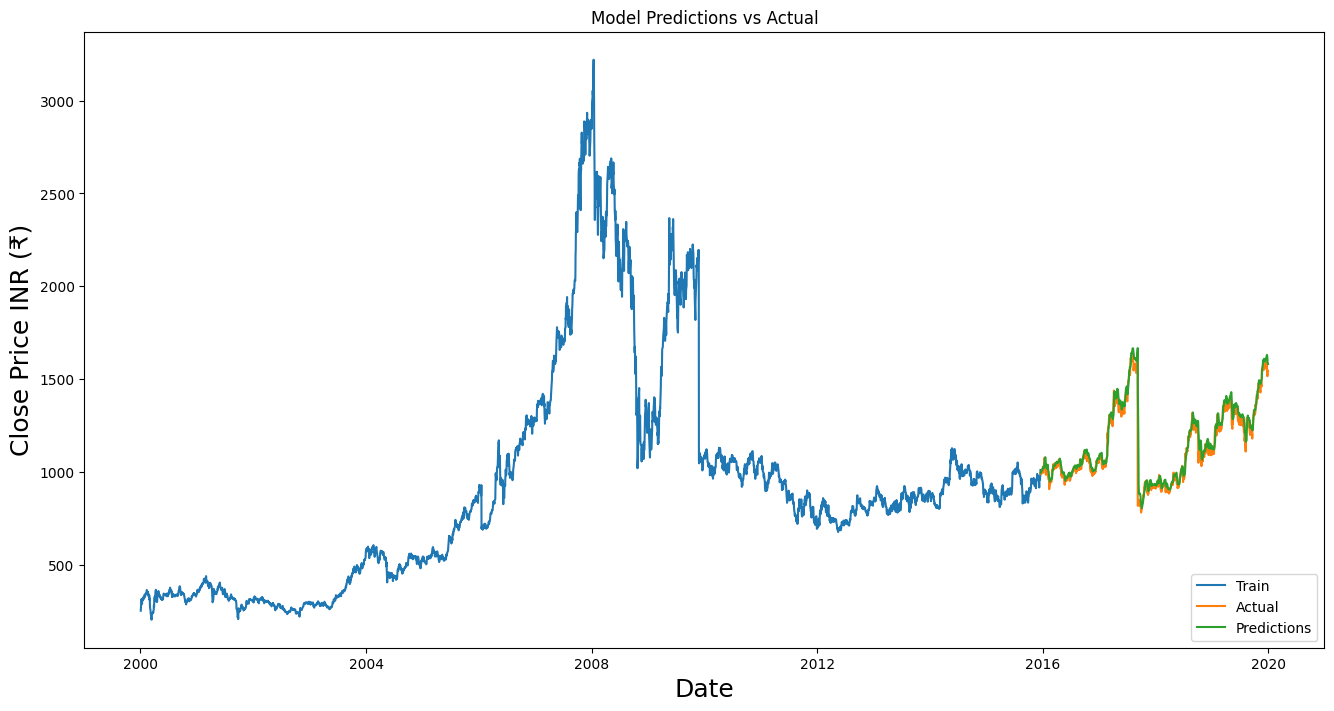

In [31]:
# Visualize the predictions
plt.figure(figsize=(16,8))
plt.title('Model Predictions vs Actual')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Actual')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━

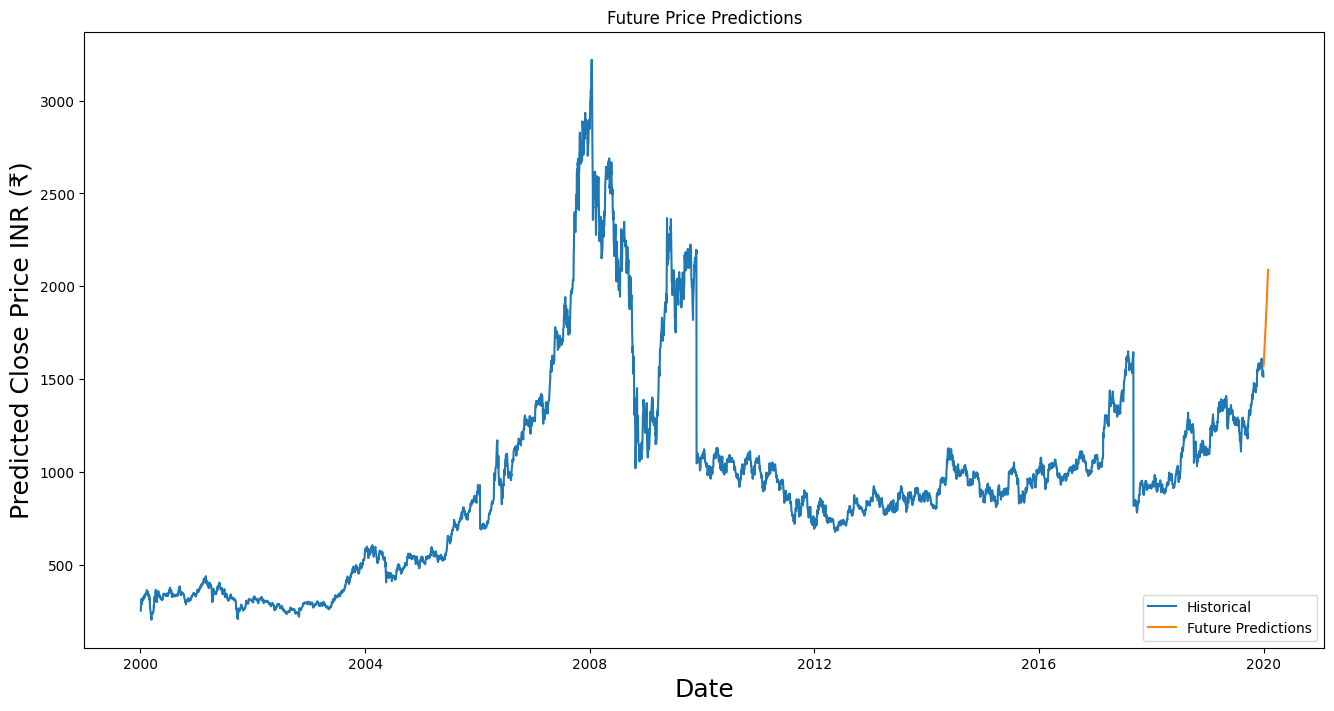

In [32]:
# Step 8: Predict future prices (e.g., next 30 days)
# Use the last 60 days from the dataset
last_60_days = scaled_data[-60:]
future_input = last_60_days.reshape(1, -1, 1)

future_predictions = []
for i in range(30):  # Predict next 30 days
    pred = model.predict(future_input)
    future_predictions.append(pred[0,0])
    # Update input by appending prediction and removing first
    future_input = np.append(future_input[:,1:,:], pred.reshape(1,1,1), axis=1)

# Inverse transform future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

# Generate future dates
last_date = df.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30)

# Create DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions.flatten()})
print(future_df)

# Plot future predictions
plt.figure(figsize=(16,8))
plt.title('Future Price Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Predicted Close Price INR (₹)', fontsize=18)
plt.plot(df['Close'], label='Historical')
plt.plot(future_df.set_index('Date'), label='Future Predictions')
plt.legend(loc='lower right')
plt.show()